In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

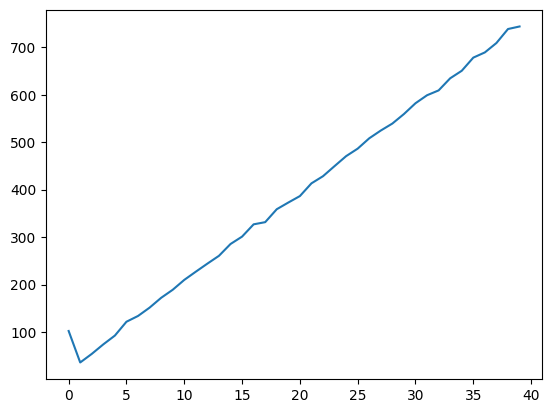

In [2]:
import numpy as np
T = 1000
K = 10
J = 30
mean_arm = 0
std_arm = 1
mu = mean_arm + std_arm * np.random.randn(K)  #rewards since Vi ∼ N (μi, 1).
sum_greedy = np.zeros((J, J))

for N in range(1, J + 1):  
    #exploration
    for j in range(1, J + 1):  
        Q = np.zeros(K)
        N_tried = np.zeros(K)
        sum_greedy[N - 1, j - 1] = 0
        for k in range(1, K + 1):
            rewards = mu[k - 1] + np.random.randn(N)  
            sum_greedy[N - 1, j - 1] += np.sum(rewards)  
            Q[k - 1] = np.mean(rewards)  
            N_tried[k - 1] = N  
        #exploiation 
        for t in range(K * N + 1, T + 1):
            arm = np.argmax(Q) 
            reward = mu[arm] + np.random.randn() 
            sum_greedy[N - 1, j - 1] += reward 
            N_tried[arm] += 1 
            Q[arm] += 1/N_tried[arm] * (reward - Q[arm])

best_mu= max(mu)
best_arm=np.argmax(best_mu)
regret_greedy = T*best_mu - np.mean(sum_greedy,axis=1); 
x=np.arange(J)
plt.plot(x, regret_greedy)


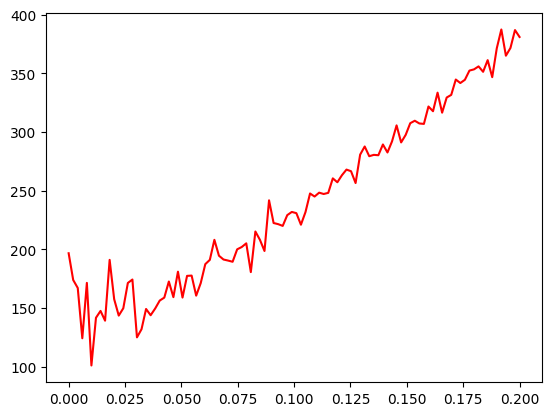

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = 1000
K = 10
J = 100
M = J
eps = np.linspace(0, 0.2, M)
mean_arm = 0
std_arm = 1
mu = mean_arm + std_arm * np.random.randn(K)  # Arms' mean reward

sum_epsg = np.zeros((M, J))
N_tried = np.zeros((M, K))

for m in range(1, M + 1):  # for each parameter in the parameter space
    e = eps[m - 1]  # Corrected line to access the m-th element of the eps array

    for j in range(1, J + 1):  # run the algorithm on J instances

        # Try each arm once first
        rewards = mu + np.random.randn(K)
        sum_epsg[m - 1, j - 1] = np.sum(rewards)
        Q = rewards
        N_tried[m - 1, :] = np.ones(K)

        for t in range(K + 1, T + 1):  # run algorithm on the remainder of this instance up to T time steps
            if np.random.rand() <= 1 - e:
                arm = np.argmax(Q)  # pick the greedy arm
            else:
                arm = np.random.randint(0, K)  # or explore

            reward = mu[arm] + np.random.randn()  # observe its reward

            sum_epsg[m - 1, j - 1] += reward  # update your reward sum so far
            N_tried[m - 1, arm] += 1  # update the number of times tried
            Q[arm] += 1 / N_tried[m - 1, arm] * (reward - Q[arm])  # update action-values

best_mu = max(mu)
regret_epsg = T * best_mu - np.mean(sum_epsg, axis=1)
plt.plot(eps, regret_epsg, 'r')
plt.show()


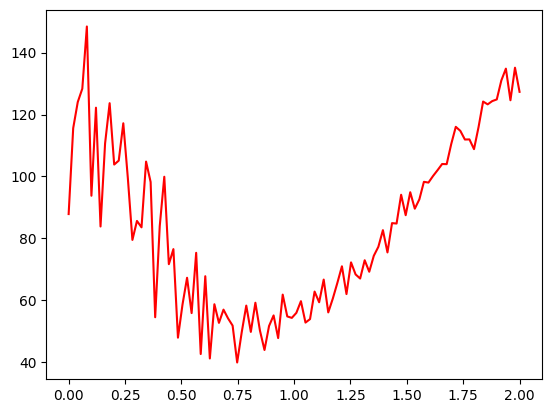

In [3]:
import numpy as np

T = 1000
K = 10
J = 100
M = J
c_all = np.linspace(0, 2, M)

mean_arm = 0
std_arm = 1
mu = mean_arm + std_arm * np.random.randn(K)  # Arms' mean reward

sum_ucb = np.zeros((M, J))
N_tried = np.zeros((M, K))

for m in range(1, M + 1):  # for each parameter in the parameter space
    c = c_all[m - 1]

    for j in range(1, J + 1):  # run the algorithm on J instances

        # Try each arm once first
        rewards = mu + np.random.randn(K)
        sum_ucb[m - 1, j - 1] = np.sum(rewards)
        Q = rewards
        N_tried[m - 1, :] = np.ones(K)

        for t in range(K + 1, T + 1):  # run algorithm on the remainder of this instance up to T time steps
            ucb_values = Q + c * np.sqrt(np.log(t) / N_tried[m - 1, :])
            arm = np.argmax(ucb_values)  # pick the highest index arm

            reward = mu[arm] + np.random.randn()  # observe its reward

            sum_ucb[m - 1, j - 1] += reward  # update your reward sum so far
            N_tried[m - 1, arm] += 1  # update the number of times tried
            Q[arm] += 1 / N_tried[m - 1, arm] * (reward - Q[arm])  # update action-values

# Your code for plotting or analysis can be added here
best_mu = max(mu)
regret_ucb = T * best_mu - np.mean(sum_ucb, axis=1)
plt.plot(c_all, regret_ucb, 'r')
plt.show()

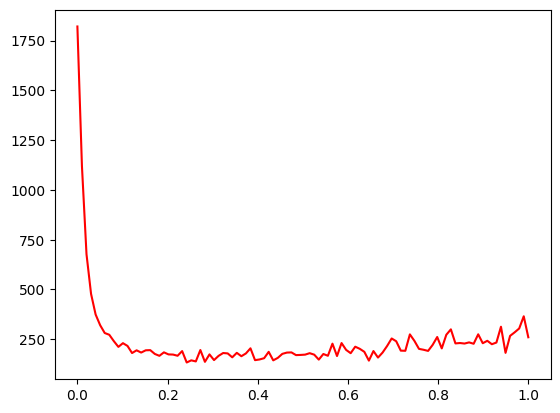

In [4]:
alpha = np.linspace(0,1,M)
sum_gb = np.zeros((M, J))
N_tried = np.zeros((M, K))

for m in range(M):
    a = alpha[m]

    for j in range(J):
        H = np.zeros(K)
        base = 0

        for t in range(1, T + 1):
            policy = np.exp(H) / np.sum(np.exp(H))
            arm = np.random.choice(K, 1, p=policy)[0]
            reward = mu[arm] + np.random.randn()

            sum_gb[m, j] += reward

            temp = np.zeros(K)
            temp[arm] = 1
            H = H + a * (reward - base) * (temp - policy)

            base = sum_gb[m, j] / t

# Now sum_gb contains the results of the algorithm


best_mu = max(mu)
regret_gb = T*best_mu - np.mean(sum_gb,axis=1);
plt.plot(alpha, regret_gb, 'r')
plt.show()
